In [1]:
import tensorflow.keras as keras

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras import losses
from keras.callbacks import EarlyStopping
from keras import backend as K

Using TensorFlow backend.


In [2]:
from sklearn.metrics import confusion_matrix
import itertools

In [3]:
import tensorflow as tf

print(tf.__version__)

1.13.1


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

samples= 5
tipo = 3    # np.random.randint(4)
index_image = np.random.randint(100000)  


# ========== EXTRACCIÓN DE DATOS ==============
archivo = open('/home/endredra/Desktop/Int_proj/EL4106-1oProyecto/dataset/HiTS2013_100k_samples(4_channels)_images_labels.pkl',"rb")
example_dict= pickle.load(archivo)
print(example_dict['labels'].shape)
print(example_dict['images'].shape)

(100000,)
(100000, 21, 21, 4)


In [5]:
xx = example_dict['images'][:, :, :, tipo]
yy= example_dict['labels']
print(xx[:75000].shape)
print(xx[75000:].shape)
print(yy[:75000].shape[0])
print(yy[75000:].shape[0])
print(yy[:100])
#database to train
x_train=xx[:75000]
y_train=yy[:75000]

#database to test
x_test=xx[75000:]
y_test=yy[75000:]


input_shape1=x_test.shape[1]
input_shape2=x_test.shape[2]
print('\n\ninput_shape: ' , input_shape1, 'x', input_shape2)

input_shape = (input_shape1, input_shape2, 1)

(75000, 21, 21)
(25000, 21, 21)
75000
25000
[0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1
 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1
 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0]


input_shape:  21 x 21


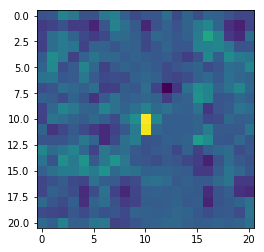

In [6]:
%matplotlib inline
plt.imshow(x_train[0])#,cmap=plt.cm.binary)
plt.show()

In [7]:
print('falso: ', y_train[0])

falso:  0


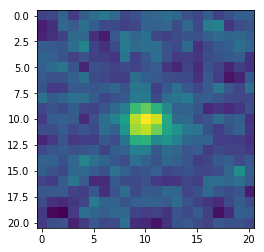

In [8]:
%matplotlib inline
plt.imshow(x_train[4])#,cmap=plt.cm.binary)
plt.show()

In [9]:
print('positivo: ', y_train[4])

positivo:  1


In [10]:
# Reshape the images.
r_x_train= np.expand_dims(x_train, axis=3)
r_x_test = np.expand_dims(x_test, axis=3)

In [11]:
############ modelo MLP #################

#model = tf.keras.models.Sequential()
 
#capas

#model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))


############ modelo Conv test #################


#model = Sequential()
#model.add(Conv2D(32, (3, 3), input_shape=input_shape))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))


#model.add(Flatten())
#model.add(Dense(32))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
#model.add(Dense(2))
#model.add(Activation('softmax'))


############ modelo Conv Keras #################


#model = Sequential([
#  Conv2D(num_filters, filter_size, input_shape=input_shape),
#  MaxPooling2D(pool_size=pool_size),
#  Flatten(),
#  Dense(10, activation='softmax'),
#])


#########################################################
##                    Sin Zero Padding                 ##      
#########################################################
##    21x21x1 -> 19x19x8 -> 9x9x8 -> FC=10 -> FC=2     ##
#########################################################


#########################################################
##                    Con Zero Padding                 ##
#########################################################
##    21x21x1 -> 21x21x8 -> 10x10x8 -> FC=10 -> FC=2   ##
#########################################################


num_filters = 8  #profundidad
filter_size = 3  #3x3 filter (conv3)
pool_size = 2    # Max Pooling de 2

model = Sequential([
  Conv2D(num_filters, filter_size, padding='same', input_shape=input_shape),
  MaxPooling2D(pool_size=pool_size),
])

model.add(Flatten())
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

#model.summary()
#compile

#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

#model.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])



sgd = optimizers.SGD(lr=0.01)   #Stochastic gradient descent optimizer
loss_cce = losses.sparse_categorical_crossentropy   #sparse categorical crossentropy

model.compile(optimizer=sgd,
              loss=loss_cce,
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 21, 21, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
__________

In [13]:
#entrenar
epocas=30
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

history = model.fit(r_x_train, y_train, validation_split=0.25, batch_size=10, epochs=epocas, callbacks=[es])



Instructions for updating:
Use tf.cast instead.
Train on 56250 samples, validate on 18750 samples
Epoch 1/30
56250/56250 [==============================] - 15s 263us/step - loss: 0.3146 - acc: 0.8482 - val_loss: 0.1535 - val_acc: 0.9454
Epoch 2/30
56250/56250 [==============================] - 14s 247us/step - loss: 0.2382 - acc: 0.8866 - val_loss: 0.1479 - val_acc: 0.9499
Epoch 3/30
56250/56250 [==============================] - 14s 245us/step - loss: 0.2243 - acc: 0.9019 - val_loss: 0.1383 - val_acc: 0.9526
Epoch 4/30
56250/56250 [==============================] - 14s 247us/step - loss: 0.2007 - acc: 0.9189 - val_loss: 0.1495 - val_acc: 0.9467
Epoch 00004: early stopping


In [14]:
val_loss, val_acc = model.evaluate(r_x_test, y_test)
print('\n\nLoss:', val_loss*100,'%\n\n')
print('Accuracy:', val_acc*100,'%\n\n')

25000/25000 [==============================] - 2s 75us/step


Loss: 14.622840055987238 %


Accuracy: 94.992 %




In [15]:
model.save('super_nova_class.model')

In [16]:
new_model = tf.keras.models.load_model('super_nova_class.model')

In [17]:
predictions_t = new_model.predict(r_x_test, batch_size=10)
print(predictions_t)

[[1.4542165e-01 8.5457838e-01]
 [2.8405031e-03 9.9715948e-01]
 [8.3684243e-02 9.1631579e-01]
 ...
 [9.9762326e-01 2.3767927e-03]
 [9.9974710e-01 2.5291464e-04]
 [9.9994886e-01 5.1185118e-05]]


In [18]:
for i in range(20):
    print('prediction: ',np.argmax(predictions_t[i]), ' -----  true class: ', y_test[i])
    

prediction:  1  -----  true class:  1
prediction:  1  -----  true class:  1
prediction:  1  -----  true class:  1
prediction:  1  -----  true class:  0
prediction:  0  -----  true class:  0
prediction:  1  -----  true class:  1
prediction:  1  -----  true class:  1
prediction:  0  -----  true class:  0
prediction:  0  -----  true class:  0
prediction:  0  -----  true class:  0
prediction:  1  -----  true class:  1
prediction:  1  -----  true class:  1
prediction:  0  -----  true class:  0
prediction:  1  -----  true class:  1
prediction:  0  -----  true class:  0
prediction:  1  -----  true class:  1
prediction:  0  -----  true class:  0
prediction:  1  -----  true class:  1
prediction:  0  -----  true class:  0
prediction:  0  -----  true class:  0


In [19]:
Samples=30

# Predict on the first 5 test images.
predictions = model.predict(r_x_test[:Samples], batch_size=10)


#r=range(Samples)
#l = [*r]
#print (l[:Samples])

# Print our model's predictions.
print('predict ', np.argmax(predictions, axis=1)) 

# Check our predictions against the ground truths.
print('class:  ', y_test[:Samples])



predict  [1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0]
class:   [1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0]


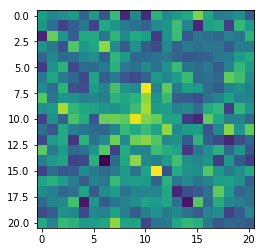

 imagem: 3 ----- tipo: 3 ----- class: 0 ----- prediction: 1 


In [20]:
%matplotlib inline
index_img=3
plt.figure("imagem: {} , tipo: {} , class: {}".format(index_img, tipo, y_test[index_img]))
plt.imshow(x_test[0])#,cmap=plt.cm.binary)


plt.show()
print(" imagem: {} ----- tipo: {} ----- class: {} ----- prediction: {} ".format(index_img, tipo, y_test[index_img], np.argmax(predictions[index_img])))


In [21]:
imagene_index=3


test_predict = model.predict(r_x_test[imagene_index:imagene_index+1], batch_size=10)
print('prediction test: ', test_predict)
print('prediction class test: ', np.argmax(test_predict), 'percentage: ', "%.2f" % (test_predict[0][np.argmax(test_predict)]*100), '%')

if(np.argmax(test_predict)==y_test[imagene_index]):
    print('acertou!')
else:
    print('errou!')


prediction test:  [[0.25162908 0.74837095]]
prediction class test:  1 percentage:  74.84 %
errou!


In [22]:
r_x_train[0].shape

(21, 21, 1)

In [23]:
x_train[0].shape

(21, 21)

In [24]:
imagene_index_t=0
typ_im=1


xx_test = example_dict['images'][:, :, :, typ_im]

r_xx_test= np.expand_dims(xx_test, axis=3)

test_predict_t = model.predict(r_xx_test[imagene_index_t:imagene_index_t+1])
print('prediction test: ', test_predict_t)
print('\n\n\nprediction class test: ', np.argmax(test_predict_t), 'percentage: ', "%.2f" % (test_predict_t[0][np.argmax(test_predict_t)]*100), '%')
print()
if(np.argmax(test_predict)==y_test[imagene_index_t]):
    print('acertou!')
else:
    print('errou!')


prediction test:  [[0.9976687  0.00233135]]



prediction class test:  0 percentage:  99.77 %

acertou!


In [25]:
print('list: ',history.history.keys())
print('loss: ',history.history['val_loss'])

list:  dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
loss:  [0.15349970208291586, 0.14790571094571303, 0.13828313110310894, 0.14954879146091407]


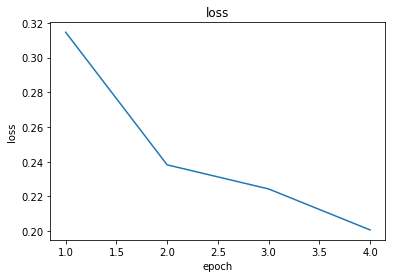

In [27]:
parametro='loss'

x_axis = np.arange(1,len(parametro)+1,1)
y_axis = history.history[parametro]

plt.plot(x_axis,y_axis)
plt.xlabel('epoch')
plt.ylabel(parametro)
plt.title(parametro)
plt.show()

In [ ]:
unos_train=0
ceros_train=0
unos_test=0
ceros_test=0

for val_train in y_train:

    if val_train==1:
        unos_train+=1
    else:
        ceros_train+=1


for val_test in y_test:

    if val_test==1:
        unos_test+=1
    else:
        ceros_test+=1    
        
print('unos_train: ', unos_train)
print('ceros_train: ', ceros_train)
print('percentage: %.2f' % (100*(unos_train/(unos_train+ceros_train))), '%')
print('\n\n\n')
print('unos_test: ', unos_test)
print('ceros_test: ', ceros_test)
print('percentage: %.2f' % (100*(unos_test/(unos_test+ceros_test))),'%')

In [ ]:
print('y_test: ', y_test.shape)
print('np.argmax(predictions, axis=1)', np.argmax(predictions_t, axis=1).shape)
test_labels=y_test
rounded_predictions= model.predict_classes(r_x_test, batch_size=10)


cm= confusion_matrix(test_labels, rounded_predictions)

cm_2= np.zeros((2,2), dtype=int)
print(cm_2)
cm_2[0,0]=cm[1,1]
cm_2[1,1]=cm[0,0]
cm_2[1,0]=cm[0,1]
cm_2[0,1]=cm[1,0]
print(cm_2)

cm=cm_2


In [ ]:
def plot_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matix.
    Normalize can be applied by setting 'normalize=True'
    '''
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm= cm.astype('float') / cm.sum(axis-1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix, without normalization')
        
        
    print(cm)

    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j], 
                 horizontalalignment = 'center', 
                 color = 'white' if cm[i,j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['super_nova','no_super_nova']
plot_confusion_matrix(cm,cm_plot_labels, title = ' Confusion Matrix')

